In [1]:
import sys
import os
from pprint import pprint
sys.path.append(os.path.abspath("../../../"))
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from IPython.display import Markdown
import ipywidgets as iw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(5)
import tensorflow as tf 
tf.set_random_seed(5)

In [2]:
import usure.common.logging as usurelogging
from usure.config import config
from usure.classification.infrastructure import (
     BasicSentenceCleaner 
    ,FileLabeledCommentsDao
    ,FileWordVectorsRep)
from usure.classification.core import CnnLab, SvmLab, ClassifierInput
from usure.classification.infrastructure import FileModelDao
from usure.classification.ui import utils

Using TensorFlow backend.


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = lines => false

<IPython.core.display.Javascript object>

In [4]:
cleaner = BasicSentenceCleaner(config.assets)
commentsdao = FileLabeledCommentsDao(config.classification, cleaner)
wvrep = FileWordVectorsRep(config.embeddings)
dao = FileModelDao(config.models)
labeledcomments = commentsdao.get("intertass-CR-train-tagged.xml")

# Embeddings: CorpusFBCR2013.txt.usu.bw.kvs svm-CorpusFBCR2013.txt.usu.bw.kvs.skl

## Training and Validation Learning Curves

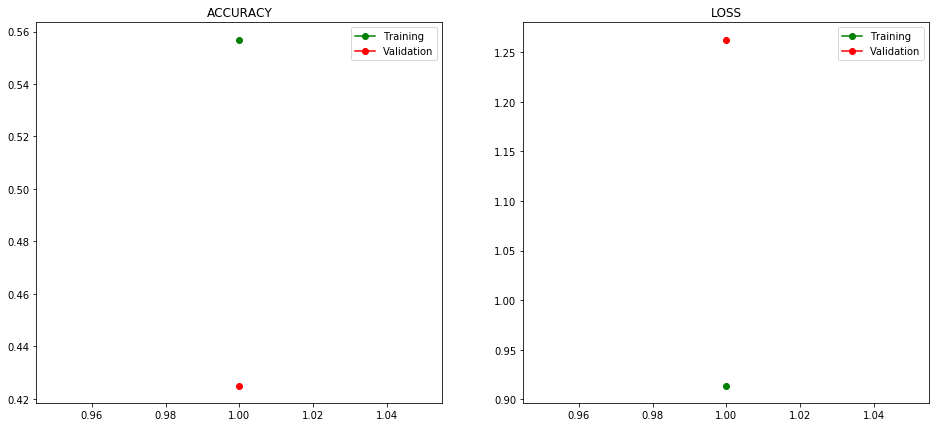

   tra acc  val acc  tra loss  val loss
0     0.56     0.42      0.91       1.3


## Training set

### Training classification report

              precision    recall  f1-score   support

           N       0.49      0.98      0.65       279
         NEU       0.00      0.00      0.00        81
        NONE       0.87      0.18      0.30       150
           P       0.79      0.48      0.60       210

   micro avg       0.56      0.56      0.56       720
   macro avg       0.54      0.41      0.39       720
weighted avg       0.60      0.56      0.49       720



### Training confusion report

             N  NEU  NONE    P
Pred/True                     
N          273    0     0    6
NEU         68    0     3   10
NONE       112    0    27   11
P          108    0     1  101




## Validation set

### Validation classification report

              precision    recall  f1-score   support

           N       0.43      0.91      0.58        32
         NEU       0.00      0.00      0.00        13
        NONE       0.00      0.00      0.00        15
           P       0.42      0.25      0.31        20

   micro avg       0.42      0.42      0.42        80
   macro avg       0.21      0.29      0.22        80
weighted avg       0.27      0.42      0.31        80



### Validation confusion report

            N  NEU  NONE  P
Pred/True                  
N          29    0     0  3
NEU        10    0     0  3
NONE       14    0     0  1
P          15    0     0  5




# Embeddings: CorpusFBCR2013.txt.usu.sw.kvs svm-CorpusFBCR2013.txt.usu.sw.kvs.skl

## Training and Validation Learning Curves

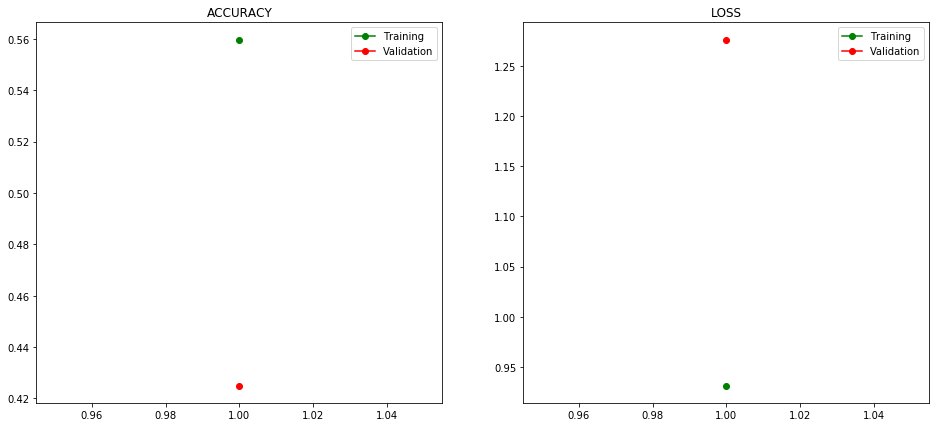

   tra acc  val acc  tra loss  val loss
0     0.56     0.42      0.93       1.3


## Training set

### Training classification report

              precision    recall  f1-score   support

           N       0.49      0.98      0.65       279
         NEU       0.00      0.00      0.00        81
        NONE       0.86      0.20      0.32       150
           P       0.79      0.47      0.59       210

   micro avg       0.56      0.56      0.56       720
   macro avg       0.53      0.41      0.39       720
weighted avg       0.60      0.56      0.49       720



### Training confusion report

             N  NEU  NONE   P
Pred/True                    
N          274    0     0   5
NEU         70    0     2   9
NONE       107    0    30  13
P          108    0     3  99




## Validation set

### Validation classification report

              precision    recall  f1-score   support

           N       0.44      0.84      0.58        32
         NEU       0.00      0.00      0.00        13
        NONE       0.50      0.07      0.12        15
           P       0.35      0.30      0.32        20

   micro avg       0.42      0.42      0.42        80
   macro avg       0.32      0.30      0.26        80
weighted avg       0.36      0.42      0.34        80



### Validation confusion report

            N  NEU  NONE  P
Pred/True                  
N          27    0     0  5
NEU         9    0     0  4
NONE       12    0     1  2
P          13    0     1  6




In [ ]:
wvs = wvrep.get_all()
def classification_lab_report(lab, embedding_name):
    display(Markdown(f'# Embeddings: {embedding_name} {lab.name}'))
    display(Markdown(f'## Training and Validation Learning Curves'))
    utils.plot_learning_curves(lab.train_report, lab.validation_report)
    utils.print_metrics(lab.train_report, lab.validation_report)
    
    display(Markdown(f'## Training set'))
    display(Markdown(f'### Training classification report'))  
    print(lab.train_report.classification_reports[-1])
    display(Markdown(f'### Training confusion report'))
    utils.print_confusion_matrix(lab.train_report.confusion_matrices[-1], lab.train_report.categories)
    display(Markdown(f'## Validation set'))
    display(Markdown(f'### Validation classification report'))  
    print(lab.validation_report.classification_reports[-1])
    display(Markdown(f'### Validation confusion report'))
    utils.print_confusion_matrix(lab.validation_report.confusion_matrices[-1], lab.validation_report.categories)
    
for wv in wvs:
    
    lab = SvmLab(ClassifierInput(labeledcomments, wv), dao)
    classification_lab_report(lab, wv.name)